In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
/kaggle/input/google-play-store-apps/license.txt


# 1. Dataset


We will be using a public data set in Kaggle in csv format. This Dataset is Google Play Store Apps.

To import the dataset to the current environment do the following steps:

Click "+ Add Data" in the top right corner of this Kaggle notebook.
Search "Google Play" in the search box.
Click Add on the first record (uploaded by Lavanda Gupta).
There will be a new folder in /kaggle/input/ containing the dataset.
Jupyter Magic Commands: You can execute linux shell commands in this notebook by preceding the command with '!' character.

to list files in the current directory you can execute in a cell:

!ls -la

In [2]:
!pwd

/kaggle/working


## Importing libraries

In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# 2. Acquire data

In [5]:
# First challenge: Try to read the csv files and store them in 2 diferent dataframes dataframe
df_reviews = pd.read_csv("../input/google-play-store-apps/googleplaystore_user_reviews.csv")
df_apps = pd.read_csv("../input/google-play-store-apps/googleplaystore.csv")



In [6]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Homework


In [7]:
#show all the rows in df_apps with Rating less than 4
df_apps.loc[df_apps.Rating<4]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
28,Pencil Sketch Drawing,ART_AND_DESIGN,3.9,136,4.6M,"10,000+",Free,0,Everyone,Art & Design,"July 12, 2018",6.0,2.3 and up
35,How to draw Ladybug and Cat Noir,ART_AND_DESIGN,3.8,564,9.2M,"100,000+",Free,0,Everyone,Art & Design,"July 11, 2018",2.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10782,Trine 2: Complete Story,GAME,3.8,252,11M,"10,000+",Paid,$16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.6M,"5,000+",Free,0,Teen,Books & Reference,"August 5, 2017",0.3.4,4.1 and up
10828,Manga-FR - Anime Vostfr,COMICS,3.4,291,13M,"10,000+",Free,0,Everyone,Comics,"May 15, 2017",2.0.1,4.0 and up
10830,News Minecraft.fr,NEWS_AND_MAGAZINES,3.8,881,2.3M,"100,000+",Free,0,Everyone,News & Magazines,"January 20, 2014",1.5,1.6 and up


In [8]:
#Drop "Android Ver" and "Genres" column
df_apps=df_apps.drop("Android Ver", axis=1)
df_apps=df_apps.drop("Genres", axis=1)

In [9]:
#After dropping "Android Ver" and "Genres"
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,"August 1, 2018",1.2.4
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,"June 8, 2018",Varies with device
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,"June 20, 2018",1.1


In [23]:
#Dropping the corrupted sample
df_apps.iloc[10472]
df_apps = df_apps.drop(10472).reset_index().drop("index", axis=1)
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10838 entries, 0 to 10837
Data columns (total 11 columns):
App               10838 non-null object
Category          10838 non-null object
Rating            9364 non-null float64
Reviews           10838 non-null object
Size              10838 non-null object
Installs          10838 non-null object
Type              10837 non-null object
Price             10838 non-null object
Content Rating    10838 non-null object
Last Updated      10838 non-null object
Current Ver       10830 non-null object
dtypes: float64(1), object(10)
memory usage: 931.5+ KB


(3.5, 5)

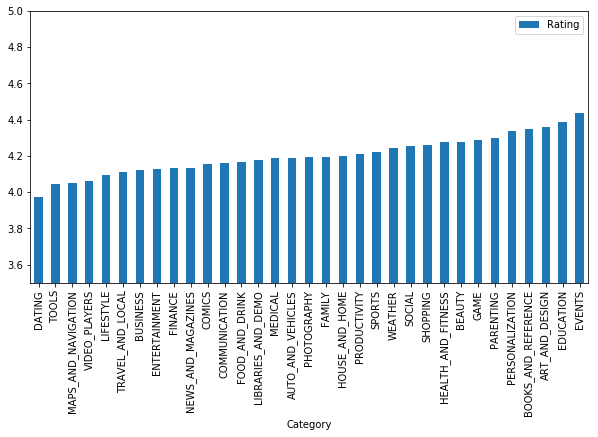

In [22]:
#plot the below chart using only df_apps dataframe and in 2 lines of code.
df_plot = df_apps[['Category','Rating']].groupby('Category').mean().sort_values("Rating")
df_plot.plot(kind="bar",figsize=(10,5)).set_ylim(3.5,5)

In [50]:
#Python code that prints the number of unique values for each column
df_apps.nunique()

App               9658
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Last Updated      1377
Current Ver       2830
dtype: int64